# TOP

### Runtime Toogles

In [1]:
checkpoint_flag = 0
append_flag = True

In [2]:
print_flag = False

In [3]:
!pip install scikit-surprise --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import defaultdict

In [5]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

os.chdir("/content/drive/MyDrive/Hunch/data")

### Loading the data

In [7]:
events_data = pd.read_csv("Train_data.csv")
poll_features = pd.read_csv("poll_question_features.csv")

### Exploratory Data Analysis

#### App Events

**Investigating user_code**

In [8]:
events_data[['user_code','poll_code']].nunique()

user_code    4499
poll_code     893
dtype: int64

In [9]:
events_data['user_code_new'] = events_data.user_code.apply(lambda x : x.split("_")[-1])
# some users user_code is missing and the value is unknown_user and such entries are being flagged as -1
events_data.loc[~events_data.user_code_new.str.isnumeric(),'user_code_new'] = -1
events_data['user_code_new'] = events_data['user_code_new'].astype(int)
events_data['user_code_new'].max()

4835

In [10]:

# some users dont have any events data
# Out of total users of 4835, we have events data for 4499 users


**Investigating poll_code**

In [11]:
events_data[['user_code','poll_code']].nunique()

user_code    4499
poll_code     893
dtype: int64

In [12]:
events_data['poll_code_new'] = events_data.poll_code.apply(lambda x : x.split("_")[-1])
# some users poll_code is missing and the value is unknown_user and such entries are being flagged as -1
events_data.loc[~events_data.poll_code_new.str.isnumeric(),'poll_code_new'] = -1
events_data['poll_code_new'] = events_data['poll_code_new'].astype(int)
events_data['poll_code_new'].max()

920

In [13]:

# some users dont have any events data
# Out of total polls of 920, we have events data for 893 polls/questions


**Investigating event type**

In [14]:
events_data.event.value_counts()

Impression        138739
Polls Answered    102950
Expand              5632
Session             3421
Shares               439
Name: event, dtype: int64

| Interaction Type | Description                                                                                              |
|------------------|----------------------------------------------------------------------------------------------------------|
| Session            | One login - logout                                               |
| Impression       | This indicates that the user only viewed the poll but did not participate in it                           |
| Expand           | This indicates that the user expanded the post to view the comments                                      |
| Shares           | This indicates that the user shared the post                                                              |
| Polls Answered   | Indicates that the user participated in the poll by voting for the option mentioned in the poll_option_id column |



**Investigating Event type - Session**

In [15]:
events_data[events_data.event=='Session'].poll_code_new.value_counts()

-1    3421
Name: poll_code_new, dtype: int64

In [16]:
(events_data.poll_code=='unknown_poll').value_counts()

False    247760
True       3421
Name: poll_code, dtype: int64

In [17]:
## All events that are of type session, the poll_code is unknown_poll,
## which is genuine,
## as these events are login-logoff events

**Investigating Event type - Impression, Expand, Session, Shares**

In [18]:
pd.set_option("display.max_rows",200)

In [19]:
events_data[

    #getting single user data
    (events_data.user_code.isin(events_data.sample(1).user_code)) &

    #getting relevant events
    (events_data.event.isin(['Impression','Expand','Session','Shares']))

].sort_values(['user_code','poll_code','event'])[['createdAt','user_code','poll_code','event','id_code']]

,createdAt,user_code,poll_code,event,id_code
78837,2023-01-26 20:25:59 UTC,user_2750,poll_115,Impression,option_106314
78849,2023-01-26 20:28:22 UTC,user_2750,poll_120,Impression,option_106326
78835,2023-01-26 20:25:59 UTC,user_2750,poll_144,Impression,option_106312
78843,2023-01-26 20:27:16 UTC,user_2750,poll_168,Impression,option_106320
131418,2023-01-26 20:21:46 UTC,user_2750,poll_186,Expand,option_164708
78864,2023-01-26 20:33:41 UTC,user_2750,poll_19,Impression,option_106341
78851,2023-01-26 20:28:22 UTC,user_2750,poll_226,Impression,option_106328
78845,2023-01-26 20:28:22 UTC,user_2750,poll_234,Impression,option_106322
78842,2023-01-26 20:27:16 UTC,user_2750,poll_295,Impression,option_106319
78865,2023-01-26 20:33:41 UTC,user_2750,poll_296,Impression,option_106342


In [20]:
events_data['user_poll_pair'] = events_data.user_code_new.astype(str) + "_" + events_data.poll_code_new.astype(str)

*Shares* - checking if all shares has impressions or not

In [21]:
events_data[events_data.event=='Shares'].user_poll_pair.nunique()

342

In [22]:
events_data[events_data.event=='Shares'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair).value_counts()


True     322
False     20
Name: user_poll_pair, dtype: int64

In [23]:
append1 = events_data[events_data.event=='Shares'].drop_duplicates('user_poll_pair',keep='first')[
    ~ events_data[events_data.event=='Shares'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair)
]

append1.event = 'Impression'

append1.shape


(20, 13)

*Expand* - checking if all shares has impressions or not

In [24]:
events_data[events_data.event=='Expand'].user_poll_pair.nunique()

4642

In [25]:
events_data[events_data.event=='Expand'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair).value_counts()

True     4476
False     166
Name: user_poll_pair, dtype: int64

In [26]:
append2 = events_data[events_data.event=='Expand'].drop_duplicates('user_poll_pair',keep='first')[
    ~ events_data[events_data.event=='Expand'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair)
]

append2.event = 'Impression'

append2.shape

(166, 13)

*Polls Answered* - checking if all shares has impressions or not

In [27]:
events_data[events_data.event=='Polls Answered'].user_poll_pair.nunique()

102916

In [28]:
events_data[events_data.event=='Polls Answered'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair).value_counts()

True     83751
False    19165
Name: user_poll_pair, dtype: int64

In [29]:
append3 = events_data[events_data.event=='Polls Answered'].drop_duplicates('user_poll_pair',keep='first')[
    ~ events_data[events_data.event=='Polls Answered'].user_poll_pair.drop_duplicates().isin(events_data[events_data.event=='Impression'].user_poll_pair)
]

append3.event = 'Impression'

append3.shape

(19165, 13)

In [30]:
if append_flag :
  events_data = pd.concat([events_data,append1,append2,append3],axis=0)

In [31]:
## impression indicates that the user has seen the poll
## after Impression user can Expand, Share or Answer
## A lot of Polls Answered didnt have impression - which was odd, thus events were created

**Investigating id_code**

In [32]:
events_data.id_code

0          option_17106
1          option_17107
2          option_17108
3          option_17109
4          option_17110
              ...      
251143    option_184762
251146    option_185051
251177    option_184768
251178    option_184767
251179    option_184768
Name: id_code, Length: 270532, dtype: object

In [33]:
events_data.id_code.isnull().sum()

0

In [34]:
events_data[events_data.event=="Session"].id_code.isnull().sum()

0

In [35]:
# id_code is not clear, how can a Session have an option_id.
# It makes sense that there is id_code for Polls Answered but having an id_code for any other event is not possible.
# Thus the description doesnt match the data
# we shall ignore the column

#### User Properties / Features :

* 'country'
* 'city_code'
* 'gender'
* 'age'
* 'college_code'

In [36]:
columns = ['country','city_code','gender','age','college_code']

In [37]:
user_features = pd.DataFrame()

for i in columns :

  temp = events_data[['user_code',i]].groupby(['user_code',i]).count().reset_index()

  print(i)

  #checking is same user has multiple entries or not
  print(temp.user_code.nunique(), temp.shape,"\n")

  if i == 'country' :
    user_features = temp
  else :
    user_features = user_features.merge(temp,on='user_code',how='left')

user_features = user_features[user_features.user_code!='unknown_user']

country
4499 (4499, 2) 

city_code
4499 (4499, 2) 

gender
4499 (4500, 2) 

age
2031 (2031, 2) 

college_code
1221 (1221, 2) 



In [38]:
user_features.head()

,user_code,country,city_code,gender,age,college_code
1,user_1,country_1,city_1,male,18.0,NaN
2,user_10,unknown_country,unknown_city,skipped_by_user,NaN,NaN
3,user_100,unknown_country,unknown_city,skipped_by_user,NaN,NaN
4,user_1000,country_1,city_1,skipped_by_user,NaN,NaN
5,user_1001,country_1,city_57,male,21.0,NaN


In [39]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4499 entries, 1 to 4499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_code     4499 non-null   object 
 1   country       4499 non-null   object 
 2   city_code     4499 non-null   object 
 3   gender        4499 non-null   object 
 4   age           2032 non-null   float64
 5   college_code  1222 non-null   object 
dtypes: float64(1), object(5)
memory usage: 246.0+ KB


In [40]:
for i in ['country', 'city_code', 'gender', 'college_code'] :

  #printing value_counts - to estimate null_values vs missing imputations

  temp2 = pd.DataFrame(user_features[i].value_counts())
  temp2 = temp2[temp2[i] > 225]

  #5% of total unique users 4500 = 225
  #logic is minimum bucket size should be 5%

  display(temp2)

,country
country_1,4285


,city_code
city_1,3351
city_18,238


,gender
skipped_by_user,2496
male,1668
female,310


,college_code
Other,494


In [41]:


# most users are from the same country
# most users are from 2 cities, others we will ignore
# age we will have to bucket
# even college code that is significant os others, thus, we will make 2 buckets of college code



In [42]:
user_features.loc[user_features.country != 'country_1', 'country'] = 'Others'

In [43]:
user_features.loc[~user_features.city_code.isin(['city_1','city_18']), 'city_code'] = 'Others'

In [44]:
user_features.loc[~user_features.gender.isin(['male','female','skipped_by_user']), 'gender'] = 'Others'

In [45]:
user_features.loc[user_features.college_code.isin(['Other']), 'college_code']  = 'code_missing_aka_others'
user_features.loc[~user_features.college_code.isin(['Other']), 'college_code']  = 'code_present'
user_features.college_code = user_features.college_code.fillna("skipped")

In [46]:
user_features.age = pd.qcut(user_features.age,3)

In [47]:
user_features

,user_code,country,city_code,gender,age,college_code
1,user_1,country_1,city_1,male,"(-1.001, 19.0]",code_present
2,user_10,Others,Others,skipped_by_user,NaN,code_present
3,user_100,Others,Others,skipped_by_user,NaN,code_present
4,user_1000,country_1,city_1,skipped_by_user,NaN,code_present
5,user_1001,country_1,Others,male,"(19.0, 22.0]",code_present
...,...,...,...,...,...,...
4495,user_995,country_1,city_1,skipped_by_user,NaN,code_present
4496,user_996,country_1,city_1,male,"(-1.001, 19.0]",code_present
4497,user_997,country_1,Others,female,"(22.0, 61.0]",code_present
4498,user_998,country_1,city_1,male,"(-1.001, 19.0]",code_present


#### Poll Features

In [48]:
poll_features.poll_code.nunique(),poll_features.shape[0]

(707, 807)

In [49]:
temp = pd.DataFrame(poll_features.poll_code.value_counts()).reset_index()

list_of_double_cat = temp[temp.poll_code>=2]['index'].values

print("count of duplicates - ",len(list_of_double_cat),"\n\n")

poll_features[poll_features.poll_code.isin(list_of_double_cat)]

count of duplicates -  60 




,poll_code,displayType,categories
9,poll_22,text,Random
10,poll_22,text,Lifestyle
16,poll_33,text,Random
17,poll_33,text,Dating and Relationship
44,poll_97,text,Random
45,poll_97,text,Other
48,poll_101,text,Random
49,poll_101,text,Other
52,poll_107,text,Random
53,poll_107,text,Would You Rather


In [50]:
poll_features[poll_features.poll_code.isin(list_of_double_cat)].categories.value_counts()

Random                     60
Other                      23
Dating and Relationship    16
Lifestyle                   5
Would You Rather            5
Hypothetical                5
Internet                    3
Philosophy and Religion     2
Trivia                      1
Name: categories, dtype: int64

In [51]:
# Based on manual investigation - random seems like an erroneous entry for these 60 polls

In [52]:
poll_features = poll_features[~((poll_features.poll_code.isin(list_of_double_cat)) & (poll_features.categories=='Random'))]

In [53]:
# checking for doule entries
temp = pd.DataFrame(poll_features.poll_code.value_counts()).reset_index()
temp[temp.poll_code>=2]['index']

Series([], Name: index, dtype: object)

In [54]:
poll_features

,poll_code,displayType,categories
0,poll_3,text,Movies and TV
1,poll_4,text,Other
2,poll_7,text,Food and Drinks
3,poll_11,text,Dating and Relationship
4,poll_12,text,Would You Rather
...,...,...,...
801,poll_698,text,Dating and Relationship
802,poll_701,text,Other
804,poll_702,text,Other
805,poll_703,text,Internet


### Data Preparation

In [55]:
#remove sessions
events_data = events_data[events_data.event!='Session']

#remove unknown users
events_data = events_data[events_data.user_code!='unknown_user']

In [56]:
#giving a score to each user
events_data['event_score'] = events_data.event.map({
    'Impression' : 1,
    'Expand' : 0,
    'Polls Answered'  : 1,
    'Shares' : 0
})

In [57]:
events_data['user_code_new'] = events_data.user_code.apply(lambda x : x.split("_")[-1]).astype(int)
events_data['poll_code_new'] = events_data.poll_code.apply(lambda x : x.split("_")[-1]).astype(int)

In [58]:
ratings = events_data.groupby(['user_code_new','poll_code_new','event']).event_score.sum().reset_index()
ratings = ratings.groupby(['user_code_new','poll_code_new']).event_score.sum().reset_index()

In [59]:
# events_data[(events_data.user_code_new==20) & (events_data.poll_code_new==273)]

In [60]:
ratings.shape

(130384, 3)

In [61]:
ratings.event_score.value_counts(sort=False)

2     99098
3      5798
1     24023
4       923
9        20
7        59
5       277
6       121
12        5
8        27
14        4
10       11
22        1
11        7
28        1
15        1
16        2
21        1
20        1
33        2
13        1
26        1
Name: event_score, dtype: int64

In [62]:
pd.qcut(ratings.event_score,q=5,duplicates='drop').value_counts(normalize=True)

(0.999, 2.0]    0.944295
(2.0, 33.0]     0.055705
Name: event_score, dtype: float64

In [63]:
# temp = pd.DataFrame(ratings.user_code_new.value_counts())
# users_to_consider = temp[temp.user_code_new > 10].index
# print(len(users_to_consider))
# ratings = ratings[ratings.user_code_new.isin(users_to_consider)]

In [64]:
ratings

,user_code_new,poll_code_new,event_score
0,1,21,2
1,1,41,2
2,1,44,2
3,1,47,2
4,1,49,2
...,...,...,...
130379,4831,288,2
130380,4832,121,2
130381,4833,288,2
130382,4834,194,2


In [65]:
# stratified to keep the distribution of movie ratings the same in train and test datasets.
train, test = train_test_split(
    ratings,
    test_size=0.1,
    stratify=pd.qcut(ratings.event_score,q=5,duplicates='drop'),
    random_state=32
)

In [66]:
ratings.to_csv("ratings.csv",index=False)

### Recommendation Engine

#### Metrics

In [67]:
metrics_dict = dict()

In [68]:
def mean_absolute_error_value(test,predictions) :
    """
    Calculate Mean Absolute Error (MAE).
    """
    test = test.merge(predictions,on=('user_code_new','poll_code_new'),how='inner')
    return mean_absolute_error(test['event_score'], test['predicted'])

def root_mean_squared_error_value(test,predictions):
    """
    Calculate Root Mean Squared Error (RMSE).
    """
    test = test.merge(predictions,on=('user_code_new','poll_code_new'),how='inner')
    return np.sqrt(mean_squared_error(test['event_score'], test['predicted']))

def precision_at_n(top_n, test, n=50):
    """
    Calculate Precision at N.
    """
    merged_df = pd.merge(top_n, test, on=['user_code_new', 'poll_code_new'], how='inner')
    return len(merged_df) / top_n.shape[0] if top_n.shape[0] > 0 else 0

def recall_at_n(top_n, test, n=50):
    """
    Calculate Recall at N.
    """
    merged_df = pd.merge(top_n, test, on=['user_code_new', 'poll_code_new'], how='inner')
    return len(merged_df) / len(test) if len(test) > 0 else 0

def f1_score_at_n(top_n, test, n=50):
    """
    Calculate F1 Score at N.
    """
    precision = precision_at_n(top_n, test, n)
    recall = recall_at_n(top_n, test, n)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def mean_reciprocal_rank(top_n, test):
    """
    Calculate Mean Reciprocal Rank (MRR).
    """
    top_n['n_rank'] = top_n.groupby('user_code_new')['predicted'].rank(ascending=False)
    merged_df = pd.merge(top_n, test, on=['user_code_new', 'poll_code_new'], how='inner')
    merged_df['rank'] = merged_df.groupby('user_code_new')['predicted'].rank(ascending=False)
    reciprocal_rank = 1 / merged_df[merged_df['rank'] == 1]['n_rank']
    return np.mean(reciprocal_rank) if len(reciprocal_rank) > 0 else 0


def mean_average_precision_at_n(top_n, test, n=50,test_type='CB'):
    """
    Calculate Mean Average Precision (MAP) at N.
    """
    average_precision_list = []
    for _, group in top_n.groupby('user_code_new'):
        relevant_items = set(test[test['user_code_new'] == group['user_code_new'].iloc[0]]['poll_code_new'].values)
        precision_at_k_list = []
        cumulative_precision = 0
        for i, item_id in enumerate(group['poll_code_new']):
            if item_id in relevant_items:
                cumulative_precision += 1
                precision_at_k_list.append(cumulative_precision / (i + 1))
        if precision_at_k_list:
            average_precision_list.append(np.mean(precision_at_k_list))
    return np.mean(average_precision_list) if average_precision_list else 0

def ndcg_at_n(top_n, test, n=50):
    """
    Calculate Normalized Discounted Cumulative Gain (NDCG) at N.
    """
    merged_df = pd.merge(top_n, test, on=['user_code_new', 'poll_code_new'], how='inner')
    merged_df['rank'] = merged_df.groupby('user_code_new')['predicted'].rank(ascending=False)
    merged_df['dcg'] = (2 ** merged_df['event_score']) / np.log2(merged_df['rank'] + 1)
    merged_df['idcg'] = (2 ** merged_df['event_score']) / np.log2(merged_df['rank'] + 2)
    ndcg = np.mean(merged_df['dcg'] / merged_df['idcg']) if len(merged_df) > 0 else 0
    return ndcg

#### Collaborative Filtering (SVD implimentation)

#### Using Latent Features

In [69]:
from surprise import Reader, Dataset, SVD
# , evaluate

In [70]:
# Get minimum and maximum rating from the dataset
min_rating = ratings.event_score.min()
max_rating = ratings.event_score.max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['user_code_new', 'poll_code_new', 'event_score']], reader)

In [71]:
from surprise.model_selection import cross_validate

svd = SVD(n_epochs=10)
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.6241  0.5533  0.5368  0.5902  0.5335  0.5605  0.5230  0.5670  0.5602  0.6000  0.5649  0.0301  
MAE (testset)     0.3212  0.3210  0.3174  0.3144  0.3156  0.3237  0.3164  0.3185  0.3227  0.3214  0.3192  0.0030  
Fit time          0.96    0.99    0.99    1.00    1.43    1.49    1.48    1.26    1.00    0.98    1.16    0.22    
Test time         0.20    0.07    0.07    0.09    0.15    0.14    0.13    0.19    0.07    0.08    0.12    0.05    


In [72]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.3192302437415477
Average RMSE:  0.5648591598259474


In [73]:
# from surprise import SVD
# from surprise.model_selection import GridSearchCV

# param_grid = {
#   'n_factors': [5,10,20],
#   'n_epochs': [5, 10, 20]
# }

# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=10)
# gs.fit(data)

# print(gs.best_score['rmse'])
# print(gs.best_params['rmse'])

In [74]:
# best hyperparameters
try :
  best_factor = gs.best_params['rmse']['n_factors']
  best_epoch = gs.best_params['rmse']['n_epochs']
except :
  best_factor = 10
  best_epoch = 100

In [75]:
# sample same trainset and testset
trainset = Dataset.load_from_df(train[['user_code_new', 'poll_code_new', 'event_score']], reader).build_full_trainset()

# We'll use the famous SVD algorithm.
svd = SVD(n_factors=best_factor, n_epochs=best_epoch)

# Train the algorithm on the trainset
svd = svd.fit(trainset)

In [76]:
testset = trainset.build_anti_testset()
predictions = svd.test(testset)

In [77]:
x = 0
for i in predictions:
  x+=1
x

3563370

In [78]:
from collections import defaultdict

def result_coverter(predictions):
    data_list = list()

    for uid, iid, true_r, est, _ in predictions:
      data_list.append({'user_code_new': uid, 'poll_code_new': iid, 'predicted': est})

    # Create a DataFrame from the list of dictionaries
    result = pd.DataFrame(data_list)

    return result

In [79]:
result = result_coverter(predictions)

In [80]:
# from collections import defaultdict

# def get_top_n(predictions, n=50):
#     top_n = defaultdict(list)

#     # Sort the predictions for each user
#     for uid, user_ratings in predictions.items():
#         user_ratings.sort(key=lambda x: x[1], reverse=True)
#         top_n[uid] = user_ratings[:n]

#     return top_n

In [81]:
def get_top_n(predictions, n=50, train=train, format='dict'):

    train['train_flag']=1
    predictions = predictions.merge(train, on=('user_code_new','poll_code_new'),how='left')
    predictions = predictions[predictions.train_flag!=1]

    # display(predictions.shape)
    # display(predictions)

    predictions = predictions.sort_values(['user_code_new','predicted','poll_code_new'],ascending=[True,False,True])
    predictions = predictions.groupby('user_code_new').head(n)

    if format=='dict' :
      top_n = dict()
      for i,row in a.iterrows():
        if row['user_code_new'] not in top_n:
          top_n[row['user_code_new']] = []
        top_n[row['user_code_new']].append((row['poll_code_new'],row['predicted']))
    else :
       top_n = predictions[['user_code_new','poll_code_new','predicted']]

    return top_n

In [82]:
top_n = get_top_n(result,n=50,train=train,format='df')

In [83]:
svd_top_40 = get_top_n(result,n=40,train=train,format='df')
svd_result = result

##### SVD - Metrics

In [84]:
# Example usage:
# Assuming you have DataFrames 'top_n' and 'test' with the specified columns

rmse_value = root_mean_squared_error_value(test,result)
mae_value = mean_absolute_error_value(test,result)
precision = precision_at_n(top_n, test, n=50)
recall = recall_at_n(top_n, test, n=50)
f1_score_value = f1_score_at_n(top_n, test, n=50)
mrr = mean_reciprocal_rank(top_n, test)
ndcg = ndcg_at_n(top_n, test, n=50)
map_value = mean_average_precision_at_n(top_n, test, n=50)

name = 'Collaborative_Filtering_SVD(Surprise)'

metrics_dict[name] = {
    'rmse_value'  :rmse_value ,
    'mae_value'  :mae_value ,
    'precision'  :precision ,
    'recall' :recall,
    'f1_score_value'  :f1_score_value ,
    'mrr' :mrr,
    'ndcg'  :ndcg ,
    'map_value'  :map_value
}

if print_flag :
  print(f"Mean Absolute Error: {mae_value:.4f}")
  print(f"Root Mean Squared Error: {rmse_value:.4f}")
  print(f"Precision at 50: {precision:.4f}")
  print(f"Recall at 50: {recall:.4f}")
  print(f"F1 Score at 50: {f1_score_value:.4f}")
  print(f"Mean Reciprocal Rank: {mrr:.4f}")
  print(f"NDCG at 50: {ndcg:.4f}")
  print(f"Mean Average Precision at 50: {map_value:.4f}")

### Final Result

In [85]:
final_result = pd.DataFrame(metrics_dict)

<Axes: ylabel='Density'>

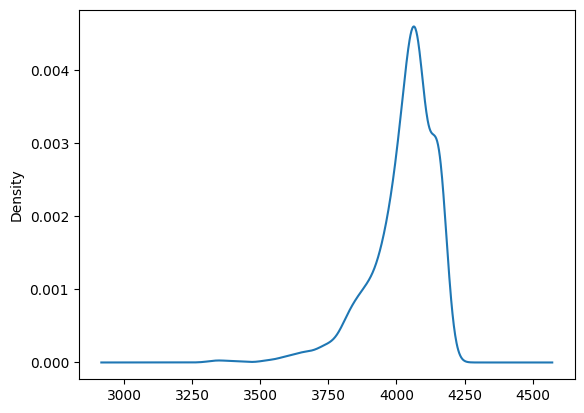

In [86]:
result.groupby('poll_code_new').user_code_new.count().plot(kind='kde')

In [87]:
final_result

,Collaborative_Filtering_SVD(Surprise)
f1_score_value,0.021558
mae_value,0.323948
map_value,0.113342
mrr,0.139101
ndcg,1.424389
precision,0.011455
recall,0.182683
rmse_value,0.568278


In [88]:
# final_result.sort_index().to_csv("../result/metrics-only-impression-poll-max-max.csv")